In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras import layers

In [3]:
import pandas as pd

# 데이터 파일 경로 설정
file_path = "./seeds_dataset.txt"

# 데이터 파일 읽기
column_names = ['Area', 'Perimeter', 'Compactness', 'Length of kernel', 'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove', 'Class']
df = pd.read_csv(file_path, sep='\t', header=None, names=column_names)

df

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [4]:
X=df.drop('Class', axis=1)

X.head()
# head()는 첫 5행만 출력함.

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [5]:
y=df['Class']
y.value_counts()

Class
1    70
2    70
3    70
Name: count, dtype: int64

## 기본 딥러닝 (DNN)

In [6]:
#one hot encoding 하기

y = pd.get_dummies(y).values

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값

scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

X_train

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove
0,-0.746116,-0.659724,-1.022187,-0.476551,-0.906322,-0.254136,-0.348533
1,0.622328,0.695258,0.184523,0.954009,0.571724,-1.096600,0.963359
2,-0.432158,-0.523469,0.747049,-0.614490,-0.252674,-0.732597,-0.456165
3,1.277543,1.270557,0.719830,1.176491,1.129326,-1.297567,0.997883
4,1.311669,1.414382,-0.037766,1.470167,0.915890,0.467881,1.420288
...,...,...,...,...,...,...,...
152,-0.271767,-0.190400,-0.368930,-0.033812,-0.247338,-0.978814,-0.549582
153,-1.002059,-1.151756,0.402275,-1.095051,-0.794268,-0.060489,-0.549582
154,1.482298,1.444661,0.833243,1.381174,1.505507,-0.401866,1.588844
155,0.062665,0.013982,0.801487,-0.120580,0.336944,-0.485714,-0.462258


In [8]:
y_train

array([[False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [False, False,  True],
       [False, False,  True],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [Fa

In [9]:
print(X_train.shape, y_train.shape)

(157, 7) (157, 3)


In [10]:
print(X_test.shape, y_test.shape)

(53, 7) (53, 3)


In [12]:
# 신경망 모델 구축
inputs = Input(shape=(X_train.shape[1],)) # 튜플로서 입력이 7개임을 나타내는 (X_train.shape[1],) == (7,)

x = Dense(32, activation='relu')(inputs)
x = Dense(24, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = layers.Dropout(0.3)(x) # 드롭아웃으로 노드 비활성화
prediction = Dense(3, activation='softmax')(x)

model = Model(inputs=inputs, outputs=prediction)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
# 신경망 훈련, 검증 데이터 전달, 조기종료 적용
early_stopping = EarlyStopping()
history = model.fit(X_train, y_train, epochs=100, batch_size=144, validation_data=(X_test, y_test), callbacks = [early_stopping], verbose=2)

Epoch 1/100


2/2 - 1s - loss: 1.2643 - accuracy: 0.3057 - val_loss: 1.1905 - val_accuracy: 0.3019 - 1s/epoch - 567ms/step
Epoch 2/100
2/2 - 0s - loss: 1.1937 - accuracy: 0.3312 - val_loss: 1.1479 - val_accuracy: 0.3019 - 24ms/epoch - 12ms/step
Epoch 3/100
2/2 - 0s - loss: 1.1927 - accuracy: 0.3057 - val_loss: 1.1060 - val_accuracy: 0.3019 - 25ms/epoch - 13ms/step
Epoch 4/100
2/2 - 0s - loss: 1.1251 - accuracy: 0.3885 - val_loss: 1.0667 - val_accuracy: 0.3019 - 22ms/epoch - 11ms/step
Epoch 5/100
2/2 - 0s - loss: 1.0807 - accuracy: 0.3949 - val_loss: 1.0303 - val_accuracy: 0.3019 - 22ms/epoch - 11ms/step
Epoch 6/100
2/2 - 0s - loss: 1.0780 - accuracy: 0.3567 - val_loss: 0.9973 - val_accuracy: 0.3774 - 21ms/epoch - 11ms/step
Epoch 7/100
2/2 - 0s - loss: 1.0422 - accuracy: 0.4268 - val_loss: 0.9667 - val_accuracy: 0.5660 - 22ms/epoch - 11ms/step
Epoch 8/100
2/2 - 0s - loss: 0.9809 - accuracy: 0.5669 - val_loss: 0.9376 - val_accuracy: 0.6604 - 21ms/epoch - 11ms/step
Epoch 9/100
2/2 - 0s - 

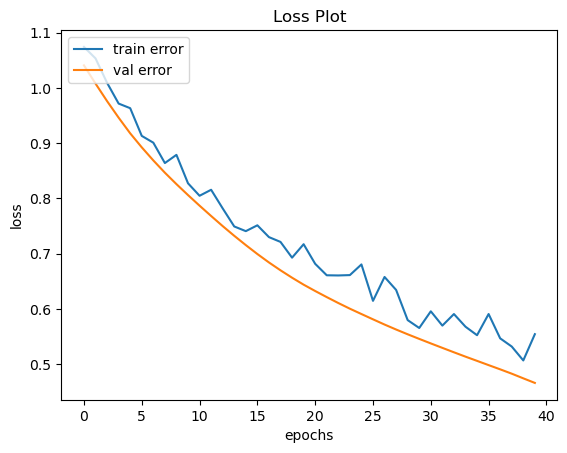

In [13]:
# 훈련 데이터와 손실값의 검증 데이터의 손실값을 그래프에 출력, 조기종료 적용
history_dict = history.history
loss_values = history_dict['loss'] # 훈련 데이터 손실 값
val_loss_values = history_dict['val_loss'] # 검증 데이터 손실 값
acc = history_dict['accuracy'] # 정확도
epochs = range(1, len(acc) + 1) # 에포크 수

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()

## CNN (Convolution Neural Network)

In [14]:
import pandas as pd

# 데이터 파일 경로 설정
file_path = "./seeds_dataset.txt"

# 데이터 파일 읽기
column_names = ['Area', 'Perimeter', 'Compactness', 'Length of kernel', 'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove', 'Class']
df = pd.read_csv(file_path, sep='\t', header=None, names=column_names)

df

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [15]:
X=df.drop('Class', axis=1)

X.head()
# head()는 첫 5행만 출력함.

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [20]:
y=df['Class']
y.value_counts()

Class
1    70
2    70
3    70
Name: count, dtype: int64

In [21]:
#one hot encoding 하기

y = pd.get_dummies(y).values

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값

y_train.shape
X_test.shape

(53, 7)

In [24]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :7], sequences[end_ix-1, 7:]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [25]:
y_train.shape

(157, 3)

In [27]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
# np.c_ : 배열을 열 방향으로 이어붙인다.
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

# 7개의 features와 3개의 label이 합쳐진 train_set, test_set
print(train_set)

[[12.62   13.67    0.8481 ...  0.      0.      1.    ]
 [16.63   15.46    0.8747 ...  1.      0.      0.    ]
 [13.54   13.85    0.8871 ...  1.      0.      0.    ]
 ...
 [19.15   16.45    0.889  ...  0.      1.      0.    ]
 [14.99   14.56    0.8883 ...  1.      0.      0.    ]
 [11.27   12.97    0.8419 ...  0.      0.      1.    ]]


In [29]:
# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_train, y_train = split_sequences(train_set, 5)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 5)
print(X_test.shape, y_test.shape)   

(153, 5, 7) (153, 3)
(49, 5, 7) (49, 3)


In [30]:
from tensorflow.keras.layers import Conv1D, Conv2D, Conv3D
from tensorflow.keras.layers import Input
from keras.layers import Dense, Flatten, Dropout

In [31]:
# 각각 스텝 수, feature 수, label 수
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
print(n_timesteps, n_features, n_outputs)

5 7 3


In [32]:
X_train.shape[1]

5

In [34]:
# 신경망 모델 구축
inputs = Input(shape=(n_timesteps, n_features,))

x = Conv1D(32, 2, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x) # 드롭아웃으로 노드 비활성화
x = Flatten()(x)
prediction = Dense(n_outputs, activation='softmax')(x)

model = Model(inputs=inputs, outputs=prediction)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 5, 7)]            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 4, 32)             480       
                                                                 
 dense_10 (Dense)            (None, 4, 64)             2112      
                                                                 
 dropout_3 (Dropout)         (None, 4, 64)             0         
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 3)                 771       
                                                                 
Total params: 3363 (13.14 KB)
Trainable params: 3363 (13.14

In [55]:
from keras.callbacks import EarlyStopping

# 신경망 훈련, 검증 데이터 전달
#  callbacks = [early_stopping],
early_stopping = EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=20, batch_size=144, validation_data=(X_test, y_test), verbose=2)

Epoch 1/20
2/2 - 0s - loss: 0.1889 - accuracy: 0.9412 - val_loss: 0.3167 - val_accuracy: 0.8980 - 59ms/epoch - 30ms/step
Epoch 2/20
2/2 - 0s - loss: 0.1991 - accuracy: 0.9085 - val_loss: 0.3485 - val_accuracy: 0.8980 - 25ms/epoch - 13ms/step
Epoch 3/20
2/2 - 0s - loss: 0.2663 - accuracy: 0.8824 - val_loss: 0.3929 - val_accuracy: 0.8367 - 24ms/epoch - 12ms/step
Epoch 4/20
2/2 - 0s - loss: 0.2645 - accuracy: 0.9150 - val_loss: 0.4056 - val_accuracy: 0.7959 - 24ms/epoch - 12ms/step
Epoch 5/20
2/2 - 0s - loss: 0.2569 - accuracy: 0.9020 - val_loss: 0.3704 - val_accuracy: 0.8163 - 24ms/epoch - 12ms/step
Epoch 6/20
2/2 - 0s - loss: 0.2314 - accuracy: 0.9216 - val_loss: 0.2827 - val_accuracy: 0.8367 - 23ms/epoch - 12ms/step
Epoch 7/20
2/2 - 0s - loss: 0.1733 - accuracy: 0.9216 - val_loss: 0.2367 - val_accuracy: 0.9184 - 24ms/epoch - 12ms/step
Epoch 8/20
2/2 - 0s - loss: 0.2073 - accuracy: 0.9020 - val_loss: 0.2313 - val_accuracy: 0.9388 - 23ms/epoch - 11ms/step
Epoch 9/20
2/2 - 0s - loss: 0.25

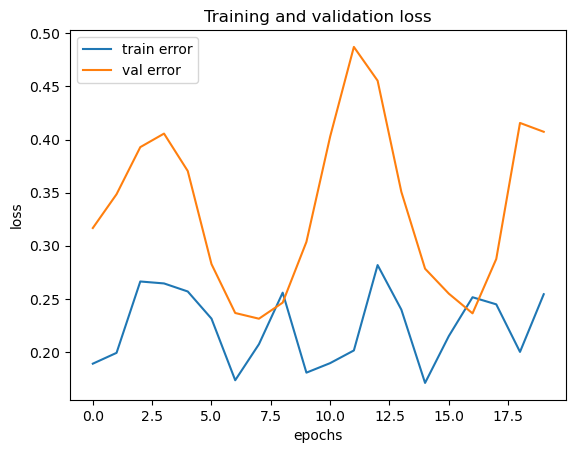

In [56]:
# 훈련 데이터와 손실값의 검증 데이터의 손실값을 그래프에 출력

history_dict = history.history
loss_values = history_dict['loss'] # 훈련 데이터 손실 값
val_loss_values = history_dict['val_loss'] # 검증 데이터 손실 값
acc = history_dict['accuracy'] # 정확도
epochs = range(1, len(acc) + 1) # 에포크 수

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()

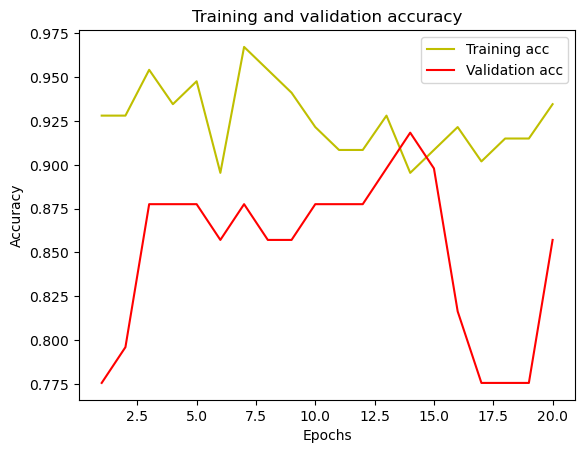

In [259]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [260]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

2/2 [==============================] - 0s 2ms/step


In [261]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.94      0.85      0.89        20
           2       0.79      1.00      0.88        15

    accuracy                           0.86        49
   macro avg       0.86      0.85      0.85        49
weighted avg       0.87      0.86      0.86        49

[[10  1  3]
 [ 2 17  1]
 [ 0  0 15]]
